# **import all necessary library**

In [55]:
import pandas as pd
import plotly.express as px
import seaborn as sns
from sklearn.ensemble import ExtraTreesClassifier , RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix , classification_report

# import the dataset

In [56]:
df = pd.read_csv('/kaggle/input/creditcardfraud/creditcard.csv')

# let's see first 5 row

In [57]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [58]:
df.columns #show all columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [60]:
df.isnull().sum() #chack is there any null value or not

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [61]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [62]:
df.Class.value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [63]:
index = df.Class.value_counts().index 
value = df.Class.value_counts().values


In [64]:
px.pie(data_frame = df,
      names = index,
      values = value,
      hole = .5)

In [65]:
legit = df[df.Class == 0]
fraud = df[df.Class == 1]

In [66]:
legit.shape

(284315, 31)

In [67]:
fraud.shape

(492, 31)

In [68]:
legit = legit.sample(n = 492)

In [69]:
df = pd.concat([legit , fraud] , axis =0)

<Axes: xlabel='Class', ylabel='count'>

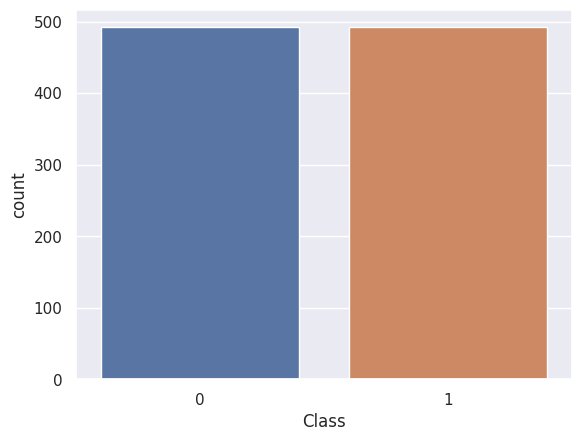

In [70]:
sns.set()
sns.countplot(x = df['Class'])

In [71]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
69306,53360.0,1.421359,-0.650112,-0.291484,-0.939903,-0.525090,-0.184560,-0.543225,0.026226,-0.861957,...,-0.424751,-0.874200,-0.101296,-0.840858,0.340163,1.099439,-0.084183,-0.018870,19.50,0
171456,120644.0,2.074119,-0.032491,-1.315500,0.375309,-0.087094,-1.387635,0.223688,-0.378436,0.672893,...,0.239494,0.836345,0.007583,0.069773,0.250141,-0.109435,-0.022780,-0.059736,1.00,0
271633,164667.0,-2.351822,-2.378350,1.108127,-1.421594,3.158286,-0.453130,-0.796607,0.320852,-0.927558,...,0.182184,0.476668,0.013378,-0.310061,0.939213,0.057358,-0.198201,-0.137720,46.21,0
178145,123497.0,1.968989,0.587563,-1.857985,3.457905,1.380915,0.322917,0.610718,-0.043555,-1.402754,...,0.112060,0.250215,-0.065614,0.059472,0.446652,0.161184,-0.098865,-0.077992,17.90,0
215925,140279.0,-0.340329,-4.351940,-2.054325,1.868963,-1.792275,-0.071660,1.196324,-0.360342,1.398364,...,0.936537,0.373037,-1.109462,0.125894,-0.224294,0.550331,-0.256772,0.142704,1213.25,0


In [72]:
df.Class.value_counts()

Class
0    492
1    492
Name: count, dtype: int64

In [73]:
X = df.drop('Class' , axis =1)
Y = df.Class

In [74]:
xtrain , xtest , ytrain , ytest = train_test_split( X , Y , test_size = .20 , random_state=100)

In [75]:
etc = ExtraTreesClassifier(random_state=100 ,n_estimators = 300 ).fit(xtrain , ytrain)

In [76]:
etc.score(xtrain , ytrain)

1.0

In [77]:
etc.score(xtest , ytest)

0.9238578680203046

In [78]:
rfc = RandomForestClassifier(random_state=100 , n_estimators = 350).fit(xtrain , ytrain)

In [79]:
rfc.score(xtest , ytest)

0.934010152284264

In [80]:
rfc.score(xtrain , ytrain)

1.0

In [81]:
lr = LogisticRegression(random_state=100 ).fit(xtrain , ytrain)

In [82]:
lr.score(xtest , ytest)

0.9238578680203046

In [83]:
lr.score(xtrain , ytrain)

0.9377382465057179

In [84]:
cm = confusion_matrix(ytest , lr.predict(xtest))
cm

array([[102,   4],
       [ 11,  80]])

In [85]:
import warnings
warnings.filterwarnings('ignore')

In [86]:
 predict = lr.predict([[4,1.22965763450793,0.141003507049326,0.0453707735899449,1.20261273673594,0.191880988597645,0.272708122899098,-0.00515900288250983,0.0812129398830894,0.464959994783886,-0.0992543211289237,-1.41690724314928,-0.153825826253651,-0.75106271556262,0.16737196252175,0.0501435942254188,-0.443586797916727,0.00282051247234708,-0.61198733994012,-0.0455750446637976,-0.21963255278686,-0.167716265815783,-0.270709726172363,-0.154103786809305,-0.780055415004671,0.75013693580659,-0.257236845917139,0.0345074297438413,0.00516776890624916,4.99]])

In [87]:
if predict==1:
    print('Credit Card Fraud Detection')
else:
    print('Credit Card Fraud not Detection')

Credit Card Fraud Detection
